In [1]:
from metrics_monai import *
import SimpleITK as sitk
import matplotlib.pyplot as plt


/Users/jiabhargava/miniconda3/envs/tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Data loading
image_path1 = '../../../BONBID2023_Train/3LABEL/MGHNICU_014-VISIT_01_lesion.mha'  
image1 = sitk.ReadImage(image_path1)
image_array1 = sitk.GetArrayFromImage(image1)

image_path2 = '../../../BONBID2023_Train/3LABEL/MGHNICU_405-VISIT_01_lesion.mha' 
image2 = sitk.ReadImage(image_path2)
image_array2 = sitk.GetArrayFromImage(image2) 

In [8]:
# Plotting function for both pred and gt
def plot_images(pred, gt):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(pred, cmap='gray')
    ax[0].set_title('Predicted image')
    ax[1].imshow(gt, cmap='gray')
    ax[1].set_title('Ground truth image')
    plt.show()

Dice: 1.0
MSD: 0.0
NSD: 1.0


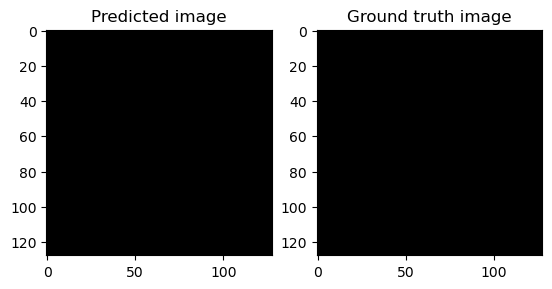

In [16]:
# Check for both empty GT and predicted
predicted = torch.zeros(image_array1.shape).unsqueeze(0).unsqueeze(0)
ground_truth = torch.zeros(image_array1.shape).unsqueeze(0).unsqueeze(0)

dice = Dice(include_background=True, reduction="mean")(predicted, ground_truth)
msd = MASD(include_background=True, distance_metric="euclidean")(predicted, ground_truth)
nsd = NSD(include_background=True, distance_metric="euclidean", class_thresholds=[3])(predicted, ground_truth)

print(f'Dice: {dice}')
print(f'MSD: {msd}')
print(f'NSD: {nsd}')

plot_images(predicted[0][0][10], ground_truth[0][0][10])

Dice: 0.0
MSD: 182.4801359052541
NSD: 0.0
torch.Size([1, 1, 23, 128, 128])


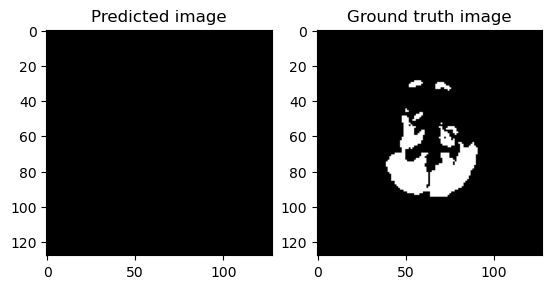

In [ ]:
# Check for non empty GT and empty predicted
predicted = torch.zeros(image_array1.shape).unsqueeze(0).unsqueeze(0)
ground_truth = torch.tensor(image_array1).unsqueeze(0).unsqueeze(0)

dice = Dice(include_background=True, reduction="mean")(predicted, ground_truth)
msd = MASD(include_background=True, distance_metric="euclidean")(predicted, ground_truth)
nsd = NSD(include_background=True, distance_metric="euclidean", class_thresholds=[3])(predicted, ground_truth)

print(f'Dice: {dice}')
print(f'MSD: {msd}')
print(f'NSD: {nsd}')

plot_images(predicted[0][0][10], ground_truth[0][0][10])

Dice: 0.3866070508956909
MSD: 2.996971845626831
NSD: 0.7385895848274231


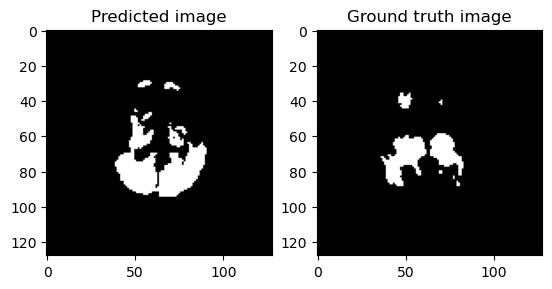

In [19]:
# Check for both non empty GT and predicted
predicted = torch.tensor(image_array1).unsqueeze(0).unsqueeze(0)
ground_truth = torch.tensor(image_array2).unsqueeze(0).unsqueeze(0)

dice = Dice(include_background=True, reduction="mean")(predicted, ground_truth)
msd = MASD(include_background=True, distance_metric="euclidean")(predicted, ground_truth)
nsd = NSD(include_background=True, distance_metric="euclidean", class_thresholds=[3])(predicted, ground_truth)

print(f'Dice: {dice.item()}')
print(f'MSD: {msd.item()}')
print(f'NSD: {nsd.item()}')

plot_images(predicted[0][0][10], ground_truth[0][0][10])